In [1]:
%matplotlib notebook
from modsim import *
import numpy as np
import pandas as pd
import operator as op

In [141]:
"""  Team 4

    h: heat transfer coefficient, 10 in this case, for static air cooling
    (related website: https://link.springer.com/article/10.1007/s00231-015-1652-x)
    k_f: the cryoscopic constant, For water, KF = 1.853 K·kg/mol;
    num_ions: the van 't Hoff factor (number of ion particles per individual molecule of solute, e.g. i = 2 for NaCl, 3 for BaCl2).
    (related website: https://en.wikipedia.org/wiki/Freezing-point_depression)
    
    max_soluability for NaCl: 35.65g/mol = 6.15 mole/kg
    A: 686.966 cm^2 = 0.0686966 m^2, surface area of a 500mL water bottle
    (related website: https://www.bottleyourbrand.com/answers/sizing/arrowhead-water-bottle-label-size
    
    T_init: -25Celsius, Initial Temperature of the water bottle, set in Northern Siberia
    (related website: https://en.wikipedia.org/wiki/Siberia)
    k_water: 0.0387
    (related_website: http://jwilson.coe.uga.edu/EMAT6680Fa2014/Gieseking/Exploration%2012/Newton%27s%20Law%20of%20Cooling.htm)
    k_ice: twice k_water
"""
k_f = 1.853 #K*Kg/mol
num_ions = 2 #Number of Ions in NaCl
A = 0.0686966
T_init = -25
T_env = 20
T_end = 4 #Temprature 
latent_heat = 334
#latent_heat=100
h = 10
k_water, k_ice = 0.0384, 0.0774
#k_water, k_ice = 0.01, 0.0392
molality_array = linspace(0, 6.147, 10)
freezing_point_array = 0 - molality_array * k_f * num_ions

r=.01
dt=1
freezing_point_array

array([  0.      ,  -2.531198,  -5.062396,  -7.593594, -10.124792,
       -12.65599 , -15.187188, -17.718386, -20.249584, -22.780782])

# Newton's cooling
The section below employs Newton's cooling to calculate temperature

In [142]:
ice = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
water = System(T_init=0, T_env=20, T_end=4, k=k_water, T=-25)

def newton_cooling(system, t):
    """Calculates the change in temperature over time"""
    #e=2.71828
    #T=system.T
    #T = system.T_env + (system.T_init - system.T_env)*e**(-system.k*t)
    
    #system.T=T
    #return system.T
    
    
    T+=-r * (system.T-T_env) * dt
    
    system.T=T
    
    return system.T

def run_simulation(system, t):
    results=TimeSeries()
    for i in range(t):
        x=newton_cooling(system, i)
        results[i]=x
    return results

run_simulation(ice, 50)

,value
0,-24.550000
1,-24.104500
2,-23.663455
3,-23.226820
4,-22.794552
5,-22.366607
6,-21.942941
7,-21.523511
8,-21.108276
9,-20.697193


<IPython.core.display.Javascript object>


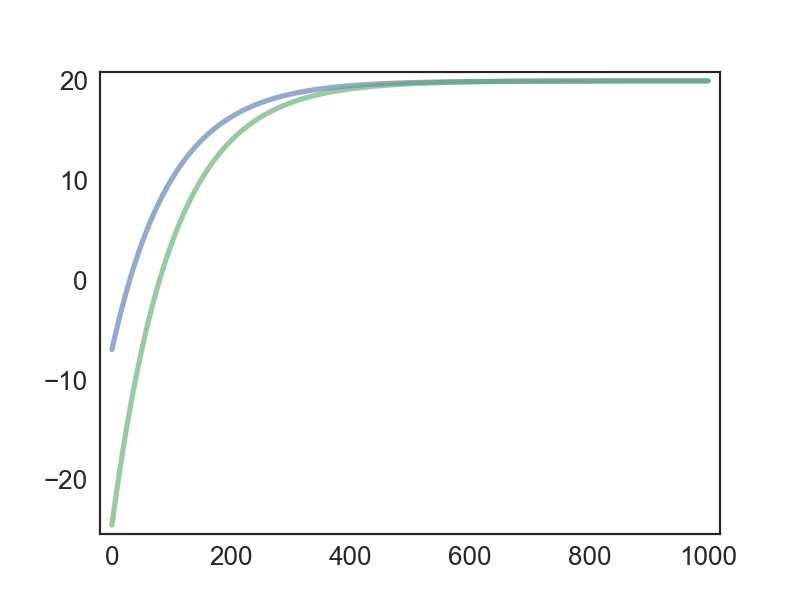

In [143]:
newfig()
def plot_results(system, t):
    y=run_simulation(system, t)
    plot(y)
    
plot_results(ice, 1000)
plot_results(water, 1000)

# Melting
The section below calculates the time it takes for water at each salt level to melt

In [144]:
def melting_at(T_fpt):
    dQ = 500 * latent_heat
    dt = dQ / (10 * A *(T_fpt - T_env))
    return -dt/60



In [145]:
def get_melting_time(freezing_point_array, update_func):
    arrary_length = len(freezing_point_array)
    sweep_fpt = TimeSeries()
    #sweep_fpt.columns('Time(s)')
    for i in range(0, arrary_length):
        sweep_fpt.loc[i+1] = update_func(freezing_point_array[i])
    return sweep_fpt

In [146]:
len(freezing_point_array)

10

In [147]:
get_melting_time(freezing_point_array, melting_at)

,value
1,202.581593
2,179.823188
3,161.661792
4,146.832336
5,134.494932
6,124.070097
7,115.145088
8,107.417954
9,100.662702
10,94.706821


In [148]:
results_in_minutes = get_melting_time(freezing_point_array, melting_at)
results_in_minutes


,value
1,202.581593
2,179.823188
3,161.661792
4,146.832336
5,134.494932
6,124.070097
7,115.145088
8,107.417954
9,100.662702
10,94.706821


<IPython.core.display.Javascript object>


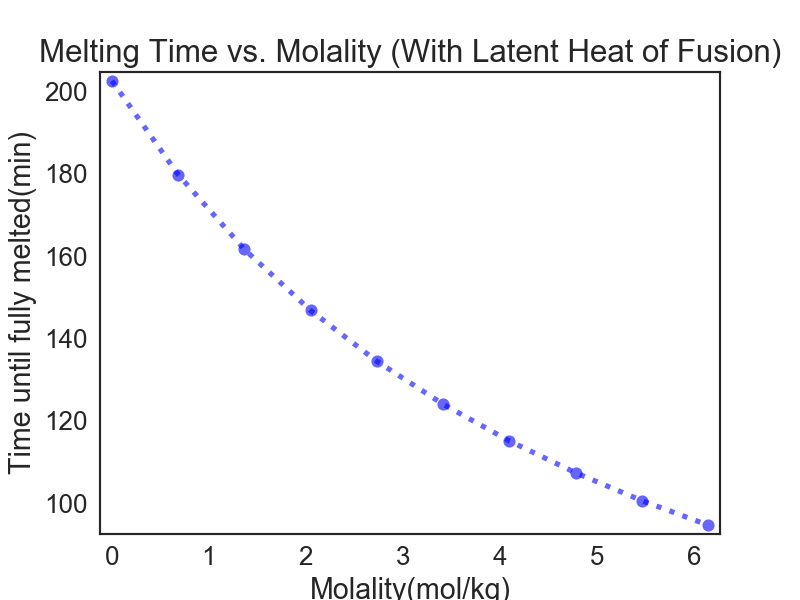

In [149]:
newfig()
plot(molality_array, results_in_minutes, 'bo:')
decorate(title='Melting Time vs. Molality (With Latent Heat of Fusion)',
         xlabel = 'Molality(mol/kg)',
         ylabel = 'Time until fully melted(min)',
         legend = False)

In [126]:
a = np.array(results_in_minutes)
np.diff(results_in_minutes)

array([-22.75840473, -18.16139585, -14.82945664, -12.33740352,
       -10.42483488,  -8.92500937,  -7.72713383,  -6.7552527 ,  -5.95588058])

In [150]:
results_in_minutes

,value
1,202.581593
2,179.823188
3,161.661792
4,146.832336
5,134.494932
6,124.070097
7,115.145088
8,107.417954
9,100.662702
10,94.706821


# Newton's Cooling(stop at Freezing Pts)

In [167]:
def run_simulation_ice(t, freezing_point_array):
    time2stop = TimeSeries()
    count=1
    temperature = DataFrame(columns = freezing_point_array)
    for freezing_pt in freezing_point_array:
        results=TimeSeries()
        recorded = False
        system = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
        for i in range(t):
            #print(str(freezing_pt)+"hello")
            x=newton_cooling(system, i)
            results[i] = x
            if x > freezing_pt and not recorded:
                print(freezing_pt)
                time2stop[count] = i
                recorded = True
                count+=1
        temperature[freezing_pt] = results
    return time2stop, temperature

In [168]:
#ice = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
%time time2stop_ice, temperature_solid = run_simulation_ice(1000, freezing_point_array)

0.0
-2.531198
-5.062396
-7.593594
-10.124792
-12.65599
-15.187188
-17.718386
-20.249584
-22.780782
Wall time: 5.61 s


In [169]:
#run_simulation_ice(ice, 100, freezing_point_array)
temperature_solid[:100]

,0.0,-2.531198,-5.062396,-7.593594,-10.124792,-12.65599,-15.187188,-17.718386,-20.249584,-22.780782
0,-24.550000,-24.550000,-24.550000,-24.550000,-24.550000,-24.550000,-24.550000,-24.550000,-24.550000,-24.550000
1,-24.104500,-24.104500,-24.104500,-24.104500,-24.104500,-24.104500,-24.104500,-24.104500,-24.104500,-24.104500
2,-23.663455,-23.663455,-23.663455,-23.663455,-23.663455,-23.663455,-23.663455,-23.663455,-23.663455,-23.663455
3,-23.226820,-23.226820,-23.226820,-23.226820,-23.226820,-23.226820,-23.226820,-23.226820,-23.226820,-23.226820
4,-22.794552,-22.794552,-22.794552,-22.794552,-22.794552,-22.794552,-22.794552,-22.794552,-22.794552,-22.794552
5,-22.366607,-22.366607,-22.366607,-22.366607,-22.366607,-22.366607,-22.366607,-22.366607,-22.366607,-22.366607
6,-21.942941,-21.942941,-21.942941,-21.942941,-21.942941,-21.942941,-21.942941,-21.942941,-21.942941,-21.942941
7,-21.523511,-21.523511,-21.523511,-21.523511,-21.523511,-21.523511,-21.523511,-21.523511,-21.523511,-21.523511
8,-21.108276,-21.108276,-21.108276,-21.108276,-21.108276,-21.108276,-21.108276,-21.108276,-21.108276,-21.108276
9,-20.697193,-20.697193,-20.697193,-20.697193,-20.697193,-20.697193,-20.697193,-20.697193,-20.697193,-20.697193


In [154]:
temperature_solid.columns = ['salt0', 'salt1', 'salt2', 'salt3', 'salt4', 'salt5', 'salt6', 'salt7', 'salt8', 'salt9']
temperature_solid
time2stop_ice

,value
1,80
2,68
3,58
4,48
5,39
6,31
7,24
8,17
9,11
10,5


# Liquid

In [155]:
def newton_cooling_above_freezing(system, t, freezing_pt):
    """Calculates the change in temperature over time"""
    #e=2.71828
    #T_init = freezing_pt
    #T=system.T
    #T = system.T_env + (T_init - system.T_env)*e**(-system.k*t)
    #system.T=T
    #return system.T
    '''if not assigned:
        T=freezing_pt
        assigned = True
    '''
    if t == 0:
        T = freezing_pt
        a = str(T)
        print("initial temp"+a)
    else:
        T = system.T
        print(T)
    T += -r * (T-T_env) * dt
    system.T = T
    return system.T

def run_simulation_water(system, t, freezing_point_array):
    time2stop = TimeSeries()
    count=1
    temperature = DataFrame(columns = freezing_point_array)
    for freezing_pt in freezing_point_array:
        results = TimeSeries()
        recorded = False
        assigned = False
        system = System(T_init=0, T_env=20, T_end=4, k=k_water, T=0)
        for i in range(t):
            x=newton_cooling_above_freezing(system, i, freezing_pt)
            results[i] = x
            if x > 4 and not recorded:
                time2stop[count] = i
                recorded = True
                count+=1
        temperature[freezing_pt] = results
    return time2stop, temperature


In [156]:
time2stop, temperature_liquid = run_simulation_water(water, 800, freezing_point_array)

initial temp0.0
0.2
0.398
0.59402
0.7880798
0.980199002
1.17039701198
1.35869304186
1.54510611144
1.72965505033
1.91235849982
2.09323491483
2.27230256568
2.44957954002
2.62508374462
2.79883290717
2.9708445781
3.14113613232
3.309724771
3.47662752329
3.64186124806
3.80544263557
3.96738820922
4.12771432713
4.28643718386
4.44357281202
4.5991370839
4.75314571306
4.90561425593
5.05655811337
5.20599253223
5.35393260691
5.50039328084
5.64538934803
5.78893545455
5.93104610001
6.07173563901
6.21101828262
6.34890809979
6.48541901879
6.62056482861
6.75435918032
6.88681558852
7.01794743263
7.14776795831
7.27629027872
7.40352737594
7.52949210218
7.65419718115
7.77765520934
7.89987865725
8.02087987068
8.14067107197
8.25926436125
8.37667171764
8.49290500046
8.60797595046
8.72189619095
8.83467722904
8.94633045675
9.05686715218
9.16629848066
9.27463549586
9.3818891409
9.48807024949
9.59318954699
9.69725765152
9.80028507501
9.90228222426
10.003259402
10.103226808
10.2021945399
10.3001725945
10.3971708686

19.9726020763
19.9728760556
19.973147295
19.973415822
19.9736816638
19.9739448472
19.9742053987
19.9744633447
19.9747187113
19.9749715242
19.9752218089
19.9754695908
19.9757148949
19.975957746
19.9761981685
19.9764361868
19.976671825
19.9769051067
19.9771360556
19.9773646951
19.9775910481
19.9778151377
19.9780369863
19.9782566164
19.9784740503
19.9786893098
19.9789024167
19.9791133925
19.9793222586
19.979529036
19.9797337456
19.9799364082
19.9801370441
19.9803356736
19.9805323169
19.9807269937
19.9809197238
19.9811105266
19.9812994213
19.9814864271
19.9816715628
19.9818548472
19.9820362987
19.9822159357
19.9823937764
19.9825698386
19.9827441402
19.9829166988
19.9830875318
19.9832566565
19.9834240899
19.983589849
19.9837539506
19.983916411
19.9840772469
19.9842364745
19.9843941097
19.9845501686
19.9847046669
19.9848576203
19.9850090441
19.9851589536
19.9853073641
19.9854542904
19.9855997475
19.9857437501
19.9858863126
19.9860274494
19.9861671749
19.9863055032
19.9864424482
19.9865780237

6.00851296232
6.1484278327
6.28694355437
6.42407411883
6.55983337764
6.69423504386
6.82729269343
6.95901976649
7.08942956883
7.21853527314
7.34634992041
7.4728864212
7.59815755699
7.72217598142
7.84495422161
7.96650467939
8.0868396326
8.20597123627
8.32391152391
8.44067240867
8.55626568458
8.67070302774
8.78399599746
8.89615603748
9.00719447711
9.11712253234
9.22595130701
9.33369179394
9.44035487601
9.54595132725
9.65049181397
9.75398689583
9.85644702687
9.95788255661
10.058303731
10.1577206937
10.2561434868
10.3535820519
10.4500462314
10.5455457691
10.6400903114
10.7336894083
10.8263525142
10.9180889891
11.0089080992
11.0988190182
11.187830828
11.2759525197
11.3631929945
11.4495610646
11.5350654539
11.6197147994
11.7035176514
11.7864824749
11.8686176501
11.9499314736
12.0304321589
12.1101278373
12.1890265589
12.2671362933
12.3444649304
12.4210202811
12.4968100783
12.5718419775
12.6461235577
12.7196623222
12.7924656989
12.8645410419
12.9358956315
13.0065366752
13.0764713085
13.14570659

15.9530257776
15.9934955198
16.0335605646
16.073224959
16.1124927094
16.1513677823
16.1898541045
16.2279555634
16.2656760078
16.3030192477
16.3399890552
16.3765891647
16.412823273
16.4486950403
16.4842080899
16.519366009
16.5541723489
16.5886306254
16.6227443192
16.656516876
16.6899517072
16.7230521902
16.7558216682
16.7882634516
16.8203808171
16.8521770089
16.8836552388
16.9148186864
16.9456704995
16.9762137945
17.0064516566
17.03638714
17.0660232686
17.0953630359
17.1244094056
17.1531653115
17.1816336584
17.2098173218
17.2377191486
17.2653419571
17.2926885376
17.3197616522
17.3465640357
17.3730983953
17.3993674113
17.4253737372
17.4511199999
17.4766087999
17.5018427119
17.5268242847
17.5515560419
17.5760404815
17.6002800767
17.6242772759
17.6480345031
17.6715541581
17.6948386165
17.7178902304
17.7407113281
17.7633042148
17.7856711726
17.8078144609
17.8297363163
17.8514389531
17.8729245636
17.894195318
17.9152533648
17.9361008311
17.9567398228
17.9771724246
17.9974007004
18.0174266933

19.4080498368
19.4139693385
19.4198296451
19.4256313486
19.4313750352
19.4370612848
19.442690672
19.4482637652
19.4537811276
19.4592433163
19.4646508831
19.4700043743
19.4753043306
19.4805512873
19.4857457744
19.4908883166
19.4959794335
19.5010196391
19.5060094428
19.5109493483
19.5158398548
19.5206814563
19.5254746417
19.5302198953
19.5349176964
19.5395685194
19.5441728342
19.5487311059
19.5532437948
19.5577113569
19.5621342433
19.5665129009
19.5708477718
19.5751392941
19.5793879012
19.5835940222
19.587758082
19.5918805011
19.5959616961
19.6000020792
19.6040020584
19.6079620378
19.6118824174
19.6157635932
19.6196059573
19.6234098977
19.6271757987
19.6309040408
19.6345950004
19.6382490503
19.6418665598
19.6454478942
19.6489934153
19.6525034812
19.6559784463
19.6594186619
19.6628244753
19.6661962305
19.6695342682
19.6728389255
19.6761105363
19.6793494309
19.6825559366
19.6857303772
19.6888730735
19.6919843427
19.6950644993
19.6981138543
19.7011327158
19.7041213886
19.7070801747
19.71000

19.5834786093
19.5876438232
19.591767385
19.5958497112
19.5998912141
19.6038923019
19.6078533789
19.6117748451
19.6156570967
19.6195005257
19.6233055204
19.6270724652
19.6308017406
19.6344937232
19.6381487859
19.6417672981
19.6453496251
19.6488961288
19.6524071676
19.6558830959
19.6593242649
19.6627310223
19.6661037121
19.6694426749
19.6727482482
19.6760207657
19.679260558
19.6824679525
19.6856432729
19.6887868402
19.6918989718
19.6949799821
19.6980301823
19.7010498804
19.7040393816
19.7069989878
19.7099289979
19.712829708
19.7157014109
19.7185443968
19.7213589528
19.7241453633
19.7269039096
19.7296348706
19.7323385218
19.7350151366
19.7376649853
19.7402883354
19.7428854521
19.7454565975
19.7480020316
19.7505220112
19.7530167911
19.7554866232
19.757931757
19.7603524394
19.762748915
19.7651214259
19.7674702116
19.7697955095
19.7720975544
19.7743765789
19.7766328131
19.7788664849
19.7810778201
19.7832670419
19.7854343715
19.7875800278
19.7897042275
19.7918071852
19.7938891134
19.79595022

19.8289836244
19.8306937881
19.8323868503
19.8340629818
19.8357223519
19.8373651284
19.8389914771
19.8406015624
19.8421955467
19.8437735913
19.8453358554
19.8468824968
19.8484136718
19.8499295351
19.8514302398
19.8529159374
19.854386778
19.8558429102
19.8572844811
19.8587116363
19.8601245199
19.8615232747
19.862908042
19.8642789616
19.865636172
19.8669798102
19.8683100121
19.869626912
19.8709306429
19.8722213365
19.8734991231
19.8747641319
19.8760164906
19.8772563257
19.8784837624
19.8796989248
19.8809019355
19.8820929162
19.883271987
19.8844392671
19.8855948745
19.8867389257
19.8878715365
19.8889928211
19.8901028929
19.891201864
19.8922898453
19.8933669469
19.8944332774
19.8954889446
19.8965340552
19.8975687146
19.8985930275
19.8996070972
19.9006110262
19.901604916
19.9025888668
19.9035629781
19.9045273484
19.9054820749
19.9064272541
19.9073629816
19.9082893518
19.9092064583
19.9101143937
19.9110132497
19.9119031172
19.9127840861
19.9136562452
19.9145196828
19.9153744859
19.9162207411

19.3496132005
19.3561170685
19.3625558978
19.3689303388
19.3752410354
19.3814886251
19.3876737388
19.3937970015
19.3998590314
19.4058604411
19.4118018367
19.4176838183
19.4235069802
19.4292719104
19.4349791913
19.4406293993
19.4462231054
19.4517608743
19.4572432656
19.4626708329
19.4680441246
19.4733636833
19.4786300465
19.483843746
19.4890053086
19.4941152555
19.4991741029
19.5041823619
19.5091405383
19.5140491329
19.5189086416
19.5237195552
19.5284823596
19.533197536
19.5378655606
19.542486905
19.547062036
19.5515914156
19.5560755015
19.5605147465
19.564909599
19.569260503
19.573567898
19.577832219
19.5820538968
19.5862333578
19.5903710243
19.594467314
19.5985226409
19.6025374145
19.6065120403
19.6104469199
19.6143424507
19.6181990262
19.6220170359
19.6257968656
19.6295388969
19.633243508
19.6369110729
19.6405419622
19.6441365425
19.6476951771
19.6512182253
19.6547060431
19.6581589827
19.6615773928
19.6649616189
19.6683120027
19.6716288827
19.6749125939
19.6781634679
19.6813818332
19

19.4866236577
19.4917574211
19.4968398469
19.5018714484
19.5068527339
19.5117842066
19.5166663645
19.5214997009
19.5262847039
19.5310218568
19.5357116383
19.5403545219
19.5449509767
19.5495014669
19.5540064522
19.5584663877
19.5628817238
19.5672529066
19.5715803775
19.5758645738
19.580105928
19.5843048687
19.5884618201
19.5925772019
19.5966514298
19.6006849155
19.6046780664
19.6086312857
19.6125449729
19.6164195231
19.6202553279
19.6240527746
19.6278122469
19.6315341244
19.6352187832
19.6388665953
19.6424779294
19.6460531501
19.6495926186
19.6530966924
19.6565657255
19.6600000682
19.6634000675
19.6667660669
19.6700984062
19.6733974221
19.6766634479
19.6798968134
19.6830978453
19.6862668668
19.6894041982
19.6925101562
19.6955850546
19.6986292041
19.701642912
19.7046264829
19.7075802181
19.7105044159
19.7133993718
19.716265378
19.7191027243
19.721911697
19.72469258
19.7274456542
19.7301711977
19.7328694857
19.7355407909
19.738185383
19.7408035291
19.7433954938
19.7459615389
19.7485019235

19.8609056019
19.8622965459
19.8636735804
19.8650368446
19.8663864762
19.8677226114
19.8690453853
19.8703549315
19.8716513821
19.8729348683
19.8742055196
19.8754634644
19.8767088298
19.8779417415
19.8791623241
19.8803707008
19.8815669938
19.8827513239
19.8839238107
19.8850845726
19.8862337268
19.8873713896
19.8884976757
19.8896126989
19.8907165719
19.8918094062
19.8928913121
19.893962399
19.895022775
19.8960725473
19.8971118218
19.8981407036
19.8991592965
19.9001677036
19.9011660265
19.9021543663
19.9031328226
19.9041014944
19.9050604794
19.9060098747
19.9069497759
19.9078802781
19.9088014754
19.9097134606
19.910616326
19.9115101627
19.9123950611
19.9132711105
19.9141383994
19.9149970154
19.9158470453
19.9166885748
19.9175216891
19.9183464722
19.9191630074
19.9199713774
19.9207716636
19.921563947
19.9223483075
19.9231248244
19.9238935762
19.9246546404
19.925408094
19.9261540131
19.9268924729
19.9276235482
19.9283473127
19.9290638396
19.9297732012
19.9304754692
19.9311707145
19.93185900

In [157]:
#run_simulation_water(water, 1000, freezing_point_array)
time2stop

,value
1,22
2,34
3,44
4,54
5,62
6,70
7,78
8,85
9,91
10,97


In [201]:
def onerun(system3, t, numrun, freezing_pt):
    """Calculates data points for one run of the simulation for one level of salt.
    
    system1=ice system
    system2=latent heat system
    system3=water system
    t=amount of time running the array
    numrun=run number corresponding with appropriate salt level (between 0 and 10)
    freezing_pt=the temperature of the freezing point that corresponds with the level of salt.
    """
    below=time2stop_ice[numrun]
    middle=time2stop_ice[numrun] + results_in_minutes[numrun]
    high=time2stop_ice[numrun] + results_in_minutes[numrun] + time2stop[numrun]
    #freezing_pt = freezing_point_array[numrun]
    print(below, middle, high)
    plotpoints=TimeSeries()
    system1 = System(T_init=-25, T_env=20, T_end=4, k=k_ice, T=-25)
    system3 = System(T_init=-25, T_env=20, T_end=4, k=k_water, T=freezing_pt)
    for i in range(t):
        if i<= below:
            plotpoints[i] = newton_cooling(system1, i)
        elif i>below and i<=middle:
            plotpoints[i] = freezing_pt #the corresponding freezing temperature
        elif i > middle and i <= high:
            check= newton_cooling_above_freezing(system3, (i-middle), freezing_pt)
            plotpoints[i] = check
            if check > 4:
                break
        else:
            break
    return plotpoints    

In [202]:

onerun(water, 10000, 1, 0)


80 282.581593073 304.581593073
0.0
0.2
0.398
0.59402
0.7880798
0.980199002
1.17039701198
1.35869304186
1.54510611144
1.72965505033
1.91235849982
2.09323491483
2.27230256568
2.44957954002
2.62508374462
2.79883290717
2.9708445781
3.14113613232
3.309724771
3.47662752329
3.64186124806
3.80544263557


,value
0,-24.550000
1,-24.104500
2,-23.663455
3,-23.226820
4,-22.794552
5,-22.366607
6,-21.942941
7,-21.523511
8,-21.108276
9,-20.697193


<IPython.core.display.Javascript object>


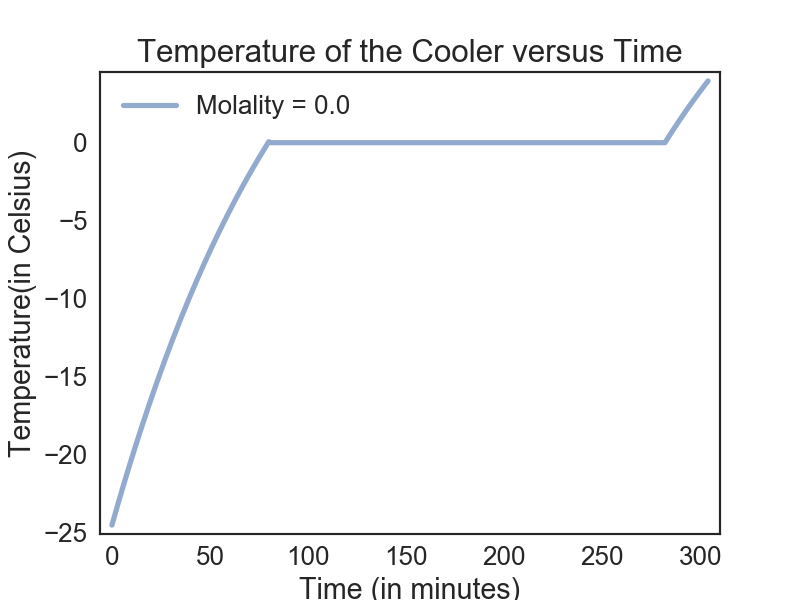

80 282.581593073 304.581593073
0.0
0.2
0.398
0.59402
0.7880798
0.980199002
1.17039701198
1.35869304186
1.54510611144
1.72965505033
1.91235849982
2.09323491483
2.27230256568
2.44957954002
2.62508374462
2.79883290717
2.9708445781
3.14113613232
3.309724771
3.47662752329
3.64186124806
3.80544263557


In [203]:
def plot_onerun(t, numrun, freezing_pt):
    """numrun=run number, starts at 0 with 0 degrees celsius and no salt
    freezing_point_array[x]= the temperature corresponding with the salt level. STARTS AT 0 WITH NO SALT."""
    x=onerun(water, t, numrun, freezing_pt)
    x_label ="Molality = " + str(molality_array[numrun-1])
    plot(x, label = x_label)
    decorate(title='Temperature of the Cooler versus Time',
             xlabel='Time (in minutes)', ylabel='Temperature(in Celsius)', legend=True)
    legend(loc='best', labelspacing=0.2)
newfig()
plot_onerun(1000, 1, freezing_point_array[0])

In [204]:
def plot_allruns(t, freezing_point_array):
    array_length = len(freezing_point_array)
    for i in range(array_length):
        plot_onerun(t, i+1, freezing_point_array[i])

<IPython.core.display.Javascript object>


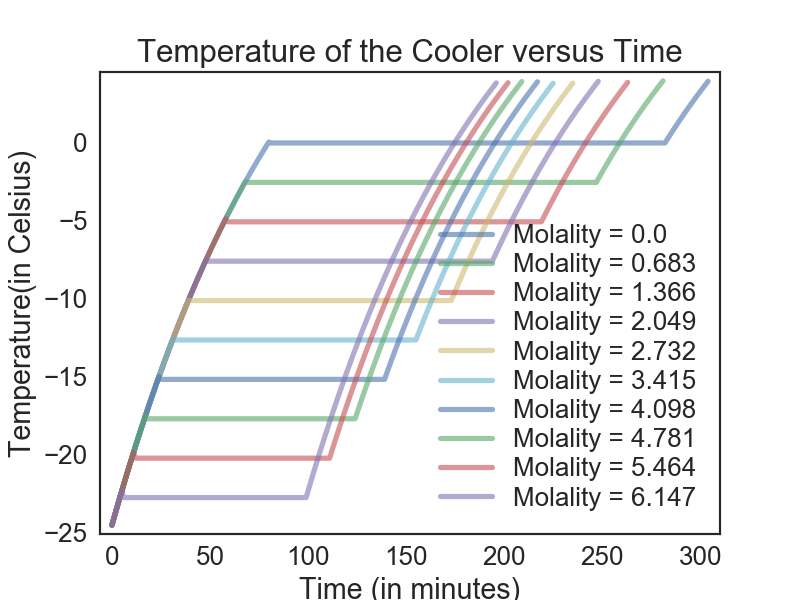

80 282.581593073 304.581593073
0.0
0.2
0.398
0.59402
0.7880798
0.980199002
1.17039701198
1.35869304186
1.54510611144
1.72965505033
1.91235849982
2.09323491483
2.27230256568
2.44957954002
2.62508374462
2.79883290717
2.9708445781
3.14113613232
3.309724771
3.47662752329
3.64186124806
3.80544263557
68 247.823188339 281.823188339
-2.531198
-2.30588602
-2.0828271598
-1.8619988882
-1.64337889932
-1.42694511033
-1.21267565922
-1.00054890263
-0.790543413605
-0.582637979469
-0.376811599674
-0.173043483677
0.0286869511593
0.228400081648
0.426116080831
0.621854920023
0.815636370823
1.00748000711
1.19740520704
1.38543115497
1.57157684342
1.75586107499
1.93830246424
2.1189194396
2.2977302452
2.47475294275
2.65000541332
2.82350535919
2.9952703056
3.16531760254
3.33366442651
3.50032778225
3.66532450443
3.82867125938
58 219.66179249 263.66179249
-5.062396
-4.81177204
-4.5636543196
-4.3180177764
-4.07483759864
-3.83408922265
-3.59574833043
-3.35979084712
-3.12619293865
-2.89493100927
-2.66598169917
-2.4

In [206]:
newfig()
plot_allruns(1200, freezing_point_array)

In [207]:
temperature_liquid.columns = ['salt0', 'salt1', 'salt2', 'salt3', 'salt4', 'salt5', 'salt6', 'salt7', 'salt8', 'salt9']
temperature_liquid

,salt0,salt1,salt2,salt3,salt4,salt5,salt6,salt7,salt8,salt9
0,0.200000,-2.305886,-4.811772,-7.317658,-9.823544,-12.329430,-14.835316,-17.341202,-19.847088,-22.352974
1,0.398000,-2.082827,-4.563654,-7.044481,-9.525309,-12.006136,-14.486963,-16.967790,-19.448617,-21.929444
2,0.594020,-1.861999,-4.318018,-6.774037,-9.230056,-11.686074,-14.142093,-16.598112,-19.054131,-21.510150
3,0.788080,-1.643379,-4.074838,-6.506296,-8.937755,-11.369214,-13.800672,-16.232131,-18.663590,-21.095048
4,0.980199,-1.426945,-3.834089,-6.241233,-8.648377,-11.055522,-13.462666,-15.869810,-18.276954,-20.684098
5,1.170397,-1.212676,-3.595748,-5.978821,-8.361894,-10.744966,-13.128039,-15.511112,-17.894184,-20.277257
6,1.358693,-1.000549,-3.359791,-5.719033,-8.078275,-10.437517,-12.796759,-15.156001,-17.515243,-19.874484
7,1.545106,-0.790543,-3.126193,-5.461842,-7.797492,-10.133142,-12.468791,-14.804441,-17.140090,-19.475740
8,1.729655,-0.582638,-2.894931,-5.207224,-7.519517,-9.831810,-12.144103,-14.456396,-16.768689,-19.080982
9,1.912358,-0.376812,-2.665982,-4.955152,-7.244322,-9.533492,-11.822662,-14.111832,-16.401002,-18.690172


In [208]:
sum_time = results_in_minutes + time2stop + time2stop_ice
sum_time

1     304.581593
2     281.823188
3     263.661792
4     248.832336
5     235.494932
6     225.070097
7     217.145088
8     209.417954
9     202.662702
10    196.706821
dtype: float64

<IPython.core.display.Javascript object>


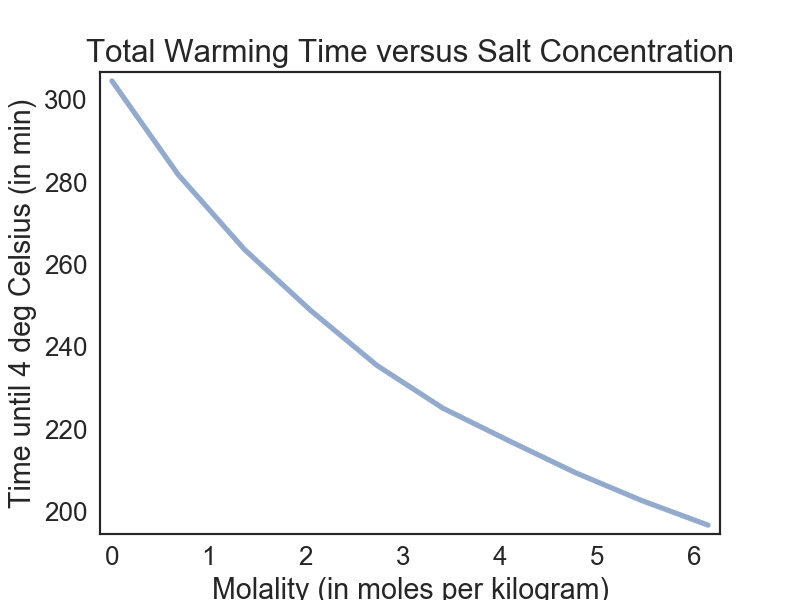

In [210]:
newfig()
plot(molality_array, sum_time)
decorate(title='Total Warming Time versus Salt Concentration', 
         xlabel='Molality (in moles per kilogram)', 
         ylabel='Time until 4 deg Celsius (in min)', 
         legend=False)